In [1]:
import torch

layer_id = [0,31]
dense = []

for id in layer_id:
    dense.append(torch.load(f'../../cache/llama/qkvout_l{id}.pth', map_location=torch.device('cpu')))

In [2]:
dense[0]['attn'].shape

torch.Size([1, 1, 4096, 4096])

In [3]:
dense[0]['attn']

tensor([[[[ 0.0000e+00, -3.3895e+38, -3.3895e+38,  ..., -3.3895e+38,
           -3.3895e+38, -3.3895e+38],
          [ 0.0000e+00,  0.0000e+00, -3.3895e+38,  ..., -3.3895e+38,
           -3.3895e+38, -3.3895e+38],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -3.3895e+38,
           -3.3895e+38, -3.3895e+38],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           -3.3895e+38, -3.3895e+38],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00, -3.3895e+38],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]]], dtype=torch.bfloat16)

In [4]:
default = []
for l in [0, 31]:
    default.append(torch.load(f'../../cache/llama/ensemble/qkvout_ensbn5_mft1_bmk0_ltNone_l{l}.pth', map_location=torch.device('cpu')))

In [5]:
default[0].keys()

dict_keys(['q', 'k', 'v', 'indices', 'ks', 'attn', 'out', 'ensemble', 'ensemble_model_setting', 'ensemble_method', 'ensemble_method_final', 'ensemble_method_final_inter_thresh', 'ensemble_method_final_bdd_mask_k', 'ensemble_per_layer_n', 'ensemble_per_attn_iter_n', 'ensemble_model_n', 'ensemble_layer_start', 'ensemble_layer_till', 'layer_id'])

In [6]:
default[0]['indices'].shape

torch.Size([32, 128, 256])

In [7]:
import torch

ensemble_model_n = 5
ensemble_method_final_inter_thresh = [1,2,3] # 4,5
ensemble_method_final_bdd_mask_k = [0,1]
ensemble_layer_till = [5,10,15,20,25]
ld = [0,31]

tlist = []

for l in ld:
    for thr in ensemble_method_final_inter_thresh:
        for bdd in ensemble_method_final_bdd_mask_k:
            for lt in ensemble_layer_till:
                t = torch.load(f'../../cache/llama/ensemble/qkvout_ensbn{ensemble_model_n}_mft{thr}_bmk{bdd}_lt{lt}_l{l}.pth', map_location=torch.device('cpu'))
                tlist.append(t)

In [8]:
tlist[0].keys()

dict_keys(['q', 'k', 'v', 'indices', 'ks', 'attn', 'out', 'ensemble', 'ensemble_model_setting', 'ensemble_method', 'ensemble_method_final', 'ensemble_method_final_inter_thresh', 'ensemble_method_final_bdd_mask_k', 'ensemble_per_layer_n', 'ensemble_per_attn_iter_n', 'ensemble_model_n', 'ensemble_layer_start', 'ensemble_layer_till', 'layer_id'])

In [9]:
for tl in tlist:
    print(tl['indices'].shape)

torch.Size([32, 128, 396])
torch.Size([32, 128, 396])
torch.Size([32, 128, 396])
torch.Size([32, 128, 396])
torch.Size([32, 128, 396])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 326])
torch.Size([32, 128, 326])
torch.Size([32, 128, 326])
torch.Size([32, 128, 326])
torch.Size([32, 128, 326])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 264])
torch.Size([32, 128, 264])
torch.Size([32, 128, 264])
torch.Size([32, 128, 264])
torch.Size([32, 128, 264])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
torch.Size([32, 128, 256])
t

In [10]:
tlist[0]['indices'].shape

torch.Size([32, 128, 396])

In [11]:
default[0]['indices'][4]

tensor([[   0,    2,    4,  ...,  506,  508,  510],
        [   0,    2,    4,  ...,  506,  508,  510],
        [   0,    2,    4,  ...,  506,  508,  510],
        ...,
        [1622, 1624, 1626,  ..., 3964, 4002, 4004],
        [2254, 2256, 2258,  ..., 4010, 4012, 4014],
        [2464, 2466, 2468,  ..., 4018, 4020, 4022]], dtype=torch.int32)

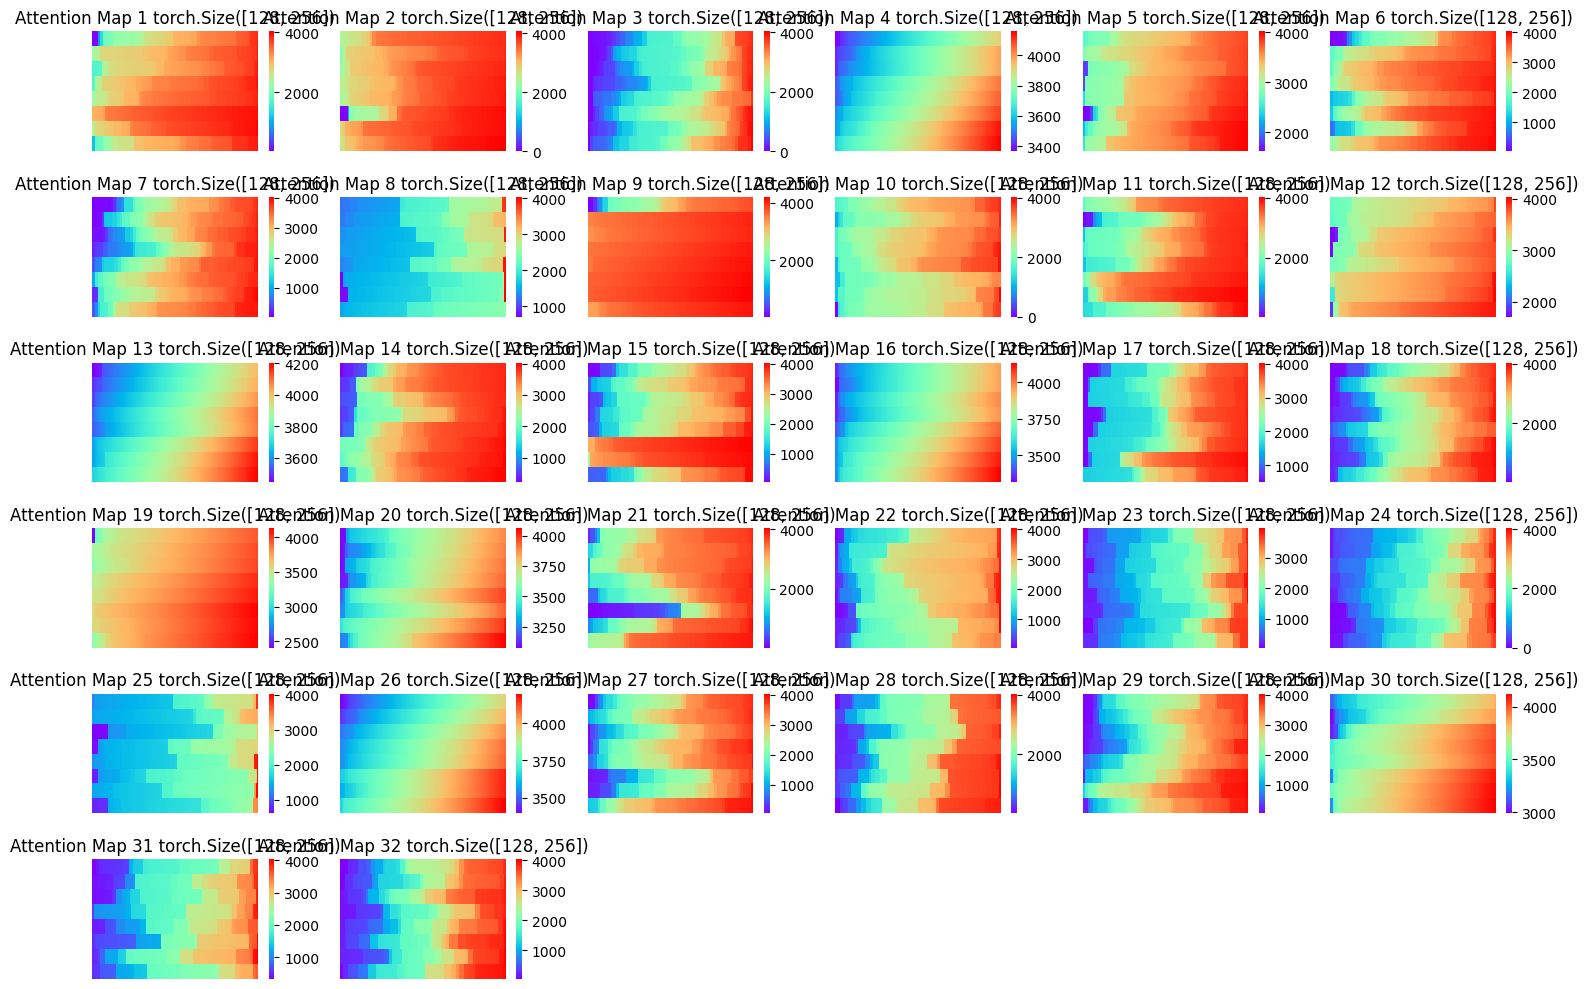

In [12]:
import torch
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Function to plot a grid of heatmaps for attention maps
def plot_attention_maps(tensor, grid_rows, grid_cols, cmap='viridis'):
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        if i < tensor.shape[0]:
            sns.heatmap(tensor[i][-8:], ax=ax, cmap=cmap, cbar=True)
            ax.set_title(f'Attention Map {i+1} {tensor[i].shape}')
            ax.axis('off')  # Optional: Hide the axis ticks
        else:
            ax.axis('off')  # Hide unused plots
    plt.tight_layout()
    plt.show()

# Calculate the number of rows and columns for the grid
num_attention_maps = default[0]['indices'].shape[0]
grid_cols = math.ceil(math.sqrt(num_attention_maps))
grid_rows = math.ceil(num_attention_maps / grid_cols)

# Plot the attention maps with a specific colormap
plot_attention_maps(default[0]['indices'], grid_rows, grid_cols, cmap='rainbow')  # Change cmap as needed

In [13]:
tlist[0]['ensemble_method_final_inter_thresh']


1

In [19]:
tlist[0].keys()

dict_keys(['q', 'k', 'v', 'indices', 'ks', 'attn', 'out', 'ensemble', 'ensemble_model_setting', 'ensemble_method', 'ensemble_method_final', 'ensemble_method_final_inter_thresh', 'ensemble_method_final_bdd_mask_k', 'ensemble_per_layer_n', 'ensemble_per_attn_iter_n', 'ensemble_model_n', 'ensemble_layer_start', 'ensemble_layer_till', 'layer_id'])

In [21]:
tlist[0]['ensemble_model_n']

5

In [23]:
tlist[0]['ensemble_layer_till']

5

In [24]:
tlist[0]['ensemble_method_final_inter_thresh']

1

In [14]:
(tlist[0]['indices'].int() >= 0).int().float().mean()

tensor(1.)

In [26]:
indices = tlist[0]['indices']

In [31]:
indices.shape

torch.Size([32, 128, 396])

In [32]:
len(indices)

32

In [30]:
for i in range(len(indices) - 1):
    print(indices[i] <= indices[i + 1] )

tensor([[ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [False,  True,  True,  ...,  True,  True,  True],
        [ True, False, False,  ...,  True,  True,  True],
        [ True, False, False,  ...,  True,  True,  True]])
tensor([[ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True]])
tensor([[ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True, False, False,  ...,  True,  True,  True],
        [ True, False, False,  

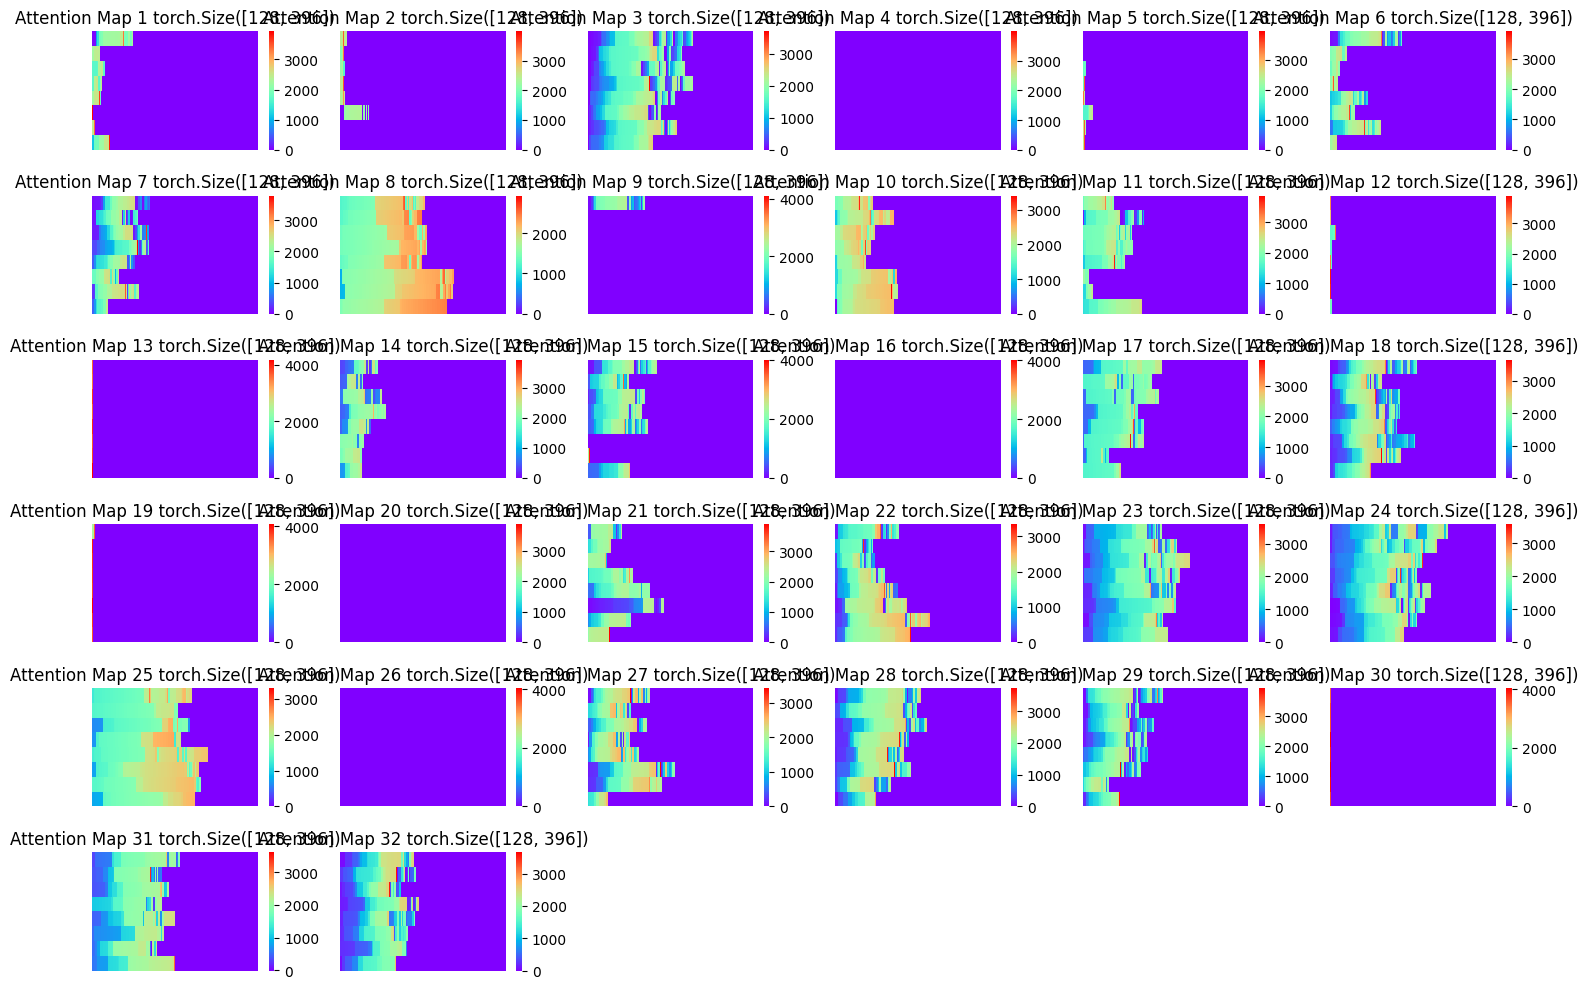

In [15]:
# Calculate the number of rows and columns for the grid
num_attention_maps = tlist[0]['indices'].shape[0]
grid_cols = math.ceil(math.sqrt(num_attention_maps)) 
grid_rows = math.ceil(num_attention_maps / grid_cols)

mask = (tlist[0]['indices'] == 32000)
tlist[0]['indices'] = torch.where(mask, -1, tlist[0]['indices'])
# Plot the attention maps with a specific colormap
plot_attention_maps(tlist[0]['indices'][:, :256], grid_rows, grid_cols, cmap='rainbow')  # Change cmap as needed

In [16]:
tlist[0]['indices']


tensor([[[ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         ...,
         [ 3.9340e+03, -1.0000e+00, -1.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 2.4760e+03,  2.4780e+03,  2.4800e+03,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 1.1280e+03,  1.1300e+03,  1.1320e+03,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00]],

        [[ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         ...,
         [ 0.0000e+00,  2

In [17]:
tlist[0]['indices']

tensor([[[ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         ...,
         [ 3.9340e+03, -1.0000e+00, -1.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 2.4760e+03,  2.4780e+03,  2.4800e+03,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 1.1280e+03,  1.1300e+03,  1.1320e+03,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00]],

        [[ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         [ 0.0000e+00,  2.0000e+00,  4.0000e+00,  ..., -1.0000e+00,
          -1.0000e+00, -1.0000e+00],
         ...,
         [ 0.0000e+00,  2